### Importing important libraries

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import pickle
from sklearn.model_selection import train_test_split

# For one hot encoding
from sklearn.preprocessing import LabelBinarizer

# For making CNNs
from keras.models import Sequential
from keras.layers import *
from keras.models import load_model

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')


### Designing of CNN model

In [21]:
# Making a Convolutional Neural Network
def CNNetwork():
    
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
    model.add(MaxPool2D((2,2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D((2,2)))
    model.add(Dropout(0.4))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D((2,2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    model.add(Dense(4,activation='softmax'))
    
    return model


def train_model(Training_data, model):
    # Reading my Training dataset
    x_,y_ = pickle.load( open(Training_data, "rb" ) )
    # Training dataset has 9259 samples
    print(x_.shape,y_.shape)
    
    # Preprocessing of data
    x_ = np.array(x_ / 255.0 - 0.5)
    
    # LabelBinarizer() method from sklearn.preprocessing module binarizes our labels using One-vs-All approach
    binarized_label = LabelBinarizer()
    
    # fit_transfrom() method transforms multi-class labels into binary labels
    # Y_train_labels is a one-hot-encoded training labels
    y_ = binarized_label.fit_transform(y_)
    
    # model.summary() prints a string summary of the network.
    model.summary()

    model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # model.fit() trains the model for a fixed number of epochs (iterations on a dataset).
    hist = model.fit(x_, y_, epochs=7, validation_split=0.2)
    
    # summarizing history for accuracy
    plt.figure(figsize=(10,6))
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarizing history for loss
    plt.figure(figsize=(10,6))
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # Saving my model in 'model.h5' file
    model.save('model.h5')
    return hist


(9259, 32, 32, 3) (9259,)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_27 (Conv2D)          

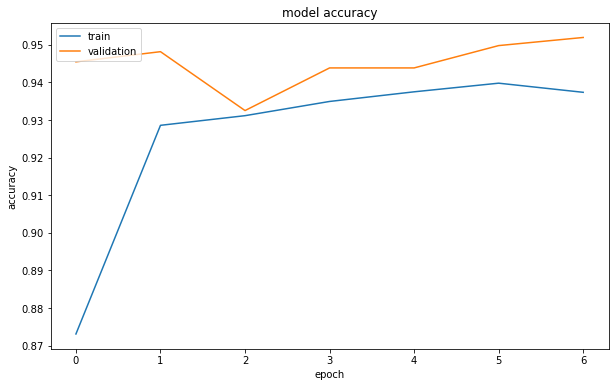

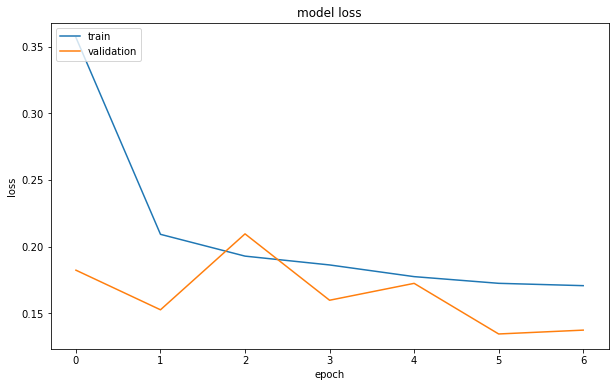

In [22]:
model = CNNetwork()
Training_set = "./datasets/Train_Dataset.p"
Testing_set = "./datasets/Test_Dataset.p"

# Training my CNN Model
train_model(Training_set, model)

### Testing our model on test set

In [23]:
def test_model(file_path, model):
    
    # Reading my testing dataset
    X_test,Y_test = pickle.load( open(file_path, "rb" ) )
    
    # There are 1030 samples in test dataset
    print(X_test.shape,Y_test.shape)
    
    ## Preprocessing of testing data
    
    X_test = np.array(X_test / 255.0 - 0.5 )
    
    # LabelBinarizer() method from sklearn.preprocessing module binarizes our labels using One-vs-All approach
    binarizered_label = LabelBinarizer()
    # binarizered_label.fit_transform() method fits label binarizer and transforms multi-class labels to binary labels.
    Y_test = binarizered_label.fit_transform(Y_test)

    print("\n\n----------Testing my Model----------------")
    
    # model.evaluate() method returns the loss value & metrics values for the model in testing phase.
    metrics = model.evaluate(X_test, Y_test)
    for i in range(len(model.metrics_names)):
        metric_name = model.metrics_names[i]
        metric_value = metrics[i]
        # Prints metrics like loss and accuraxy
        print('{}: {}'.format(metric_name, metric_value))


In [24]:
# Testing my CNN Model
test_model(Testing_set, model=load_model('model.h5'))

(1030, 32, 32, 3) (1030,)


----------Testing my Model----------------
1030/1030 [==============================] - 1s 933us/step
loss: 0.1635629724638844
accuracy: 0.946601927280426


### Testing a sample image

In [25]:
def test_sample_img(file_path, model):
    
    # Firstly, resizing the input image to [32,32,3] shape and then feeding it into neural network

    desired_dim=(32,32)
    img = cv2.imread(file_path)
    resized_img = cv2.resize(img, desired_dim, interpolation=cv2.INTER_LINEAR)
    img_ = np.expand_dims(np.array(resized_img), axis=0)
    
    # Predicting the class of the input sample image
    predicted_state = model.predict_classes(img_)

    return predicted_state

In [29]:
# Testing a single image (any random traffic light image) after training our dataset

flag = True
file_path = './datasets/red.jpg'
states = ['red', 'yellow', 'green', 'off']
if flag:
    predicted_state = test_sample_img(file_path, model=load_model('model.h5'))
    for idx in predicted_state:
        print("Colour inferred from the sample image is: ", states[idx])

Colour inferred from the sample image is:  red
